In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output

from MLP import *
from gridSearch import *

def transform(tx):
    n_classes = [3,3,2,3,4,2]
    tx = tx-1
    mat = []
    for i,pattern in enumerate(tx):
        l = list( [to_categorical( pattern[i] , n_classes[i] ) for i in range(len(pattern) ) ]  )
        p = np.concatenate( l )
        mat = np.hstack( (mat,p) )
    return mat.reshape( np.size(tx,axis=0), 17 )

In [2]:
import pandas as pd
tr_data = pd.read_csv('monk_tests/monks-2.train',sep=' ',index_col=8)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:] ; tx = transform(tx)

te_data = pd.read_csv('monk_tests/monks-2.test',sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:50,0] ; vy = to_categorical(vy)
vx = te_data[:50,1:] ; vx = transform(vx)

tey = te_data[50:,0] ; tey = to_categorical(tey)
tex = te_data[50:,1:] ; tex = transform(tex)

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)
print(tex.shape, tey.shape)

(168, 17) (168, 2)
(50, 17) (50, 2)
(381, 17) (381, 2)


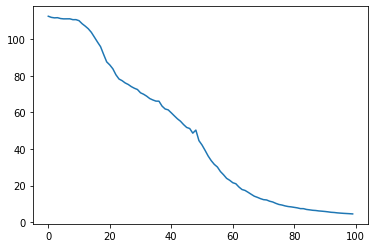

In [9]:
n = MLP(  Nodes=[17,3,2], w_range=0.3, f='relu', f_out='softmax')

n.train(tx, ty, 1e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 100,
  tresh = 0.01,
  measure_interval = 30,
  bs=30 )

plt.plot(n.loss_history)

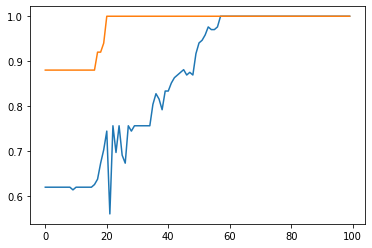

In [10]:
plt.plot(n.train_history)
plt.plot(n.valid_history)

In [11]:
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

(1.0, 1.0, 1.0)